# Prac 08.2

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

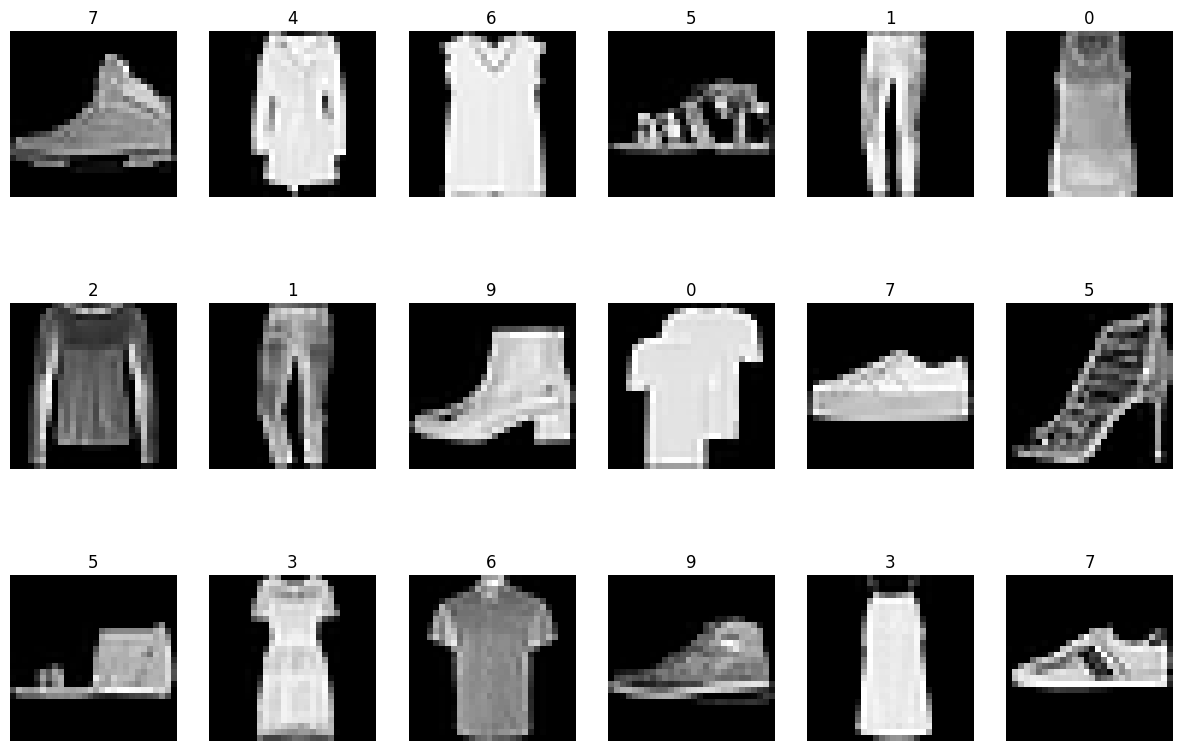

In [4]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx], cmap='gray')
        plt.title(y_train[idx])
        plt.axis("off")
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [5]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [6]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [8]:
epochs = 10
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 42s 44ms/step - loss: 0.2764 - accuracy: 0.9020 - val_loss: 0.2991 - val_accuracy: 0.8940
Epoch 2/10
938/938 [==============================] - 41s 43ms/step - loss: 0.2241 - accuracy: 0.9195 - val_loss: 0.2939 - val_accuracy: 0.8970
Epoch 3/10
938/938 [==============================] - 41s 43ms/step - loss: 0.1915 - accuracy: 0.9304 - val_loss: 0.3004 - val_accuracy: 0.8983
Epoch 4/10
938/938 [==============================] - 41s 43ms/step - loss: 0.1633 - accuracy: 0.9413 - val_loss: 0.3032 - val_accuracy: 0.9020
Epoch 5/10
938/938 [==============================] - 41s 44ms/step - loss: 0.1433 - accuracy: 0.9483 - val_loss: 0.3359 - val_accuracy: 0.8984
Epoch 6/10
938/938 [==============================] - 41s 44ms/step - loss: 0.1257 - accuracy: 0.9546 - val_loss: 0.3329 - val_accuracy: 0.9019
Epoch 7/10
938/938 [==============================] - 42s 44ms/step - loss: 0.1100 - accuracy: 0.9600 - val_loss: 0.3790 - val_accuracy:

Train Acc      0.9711666703224182
Validation Acc 0.8917999863624573


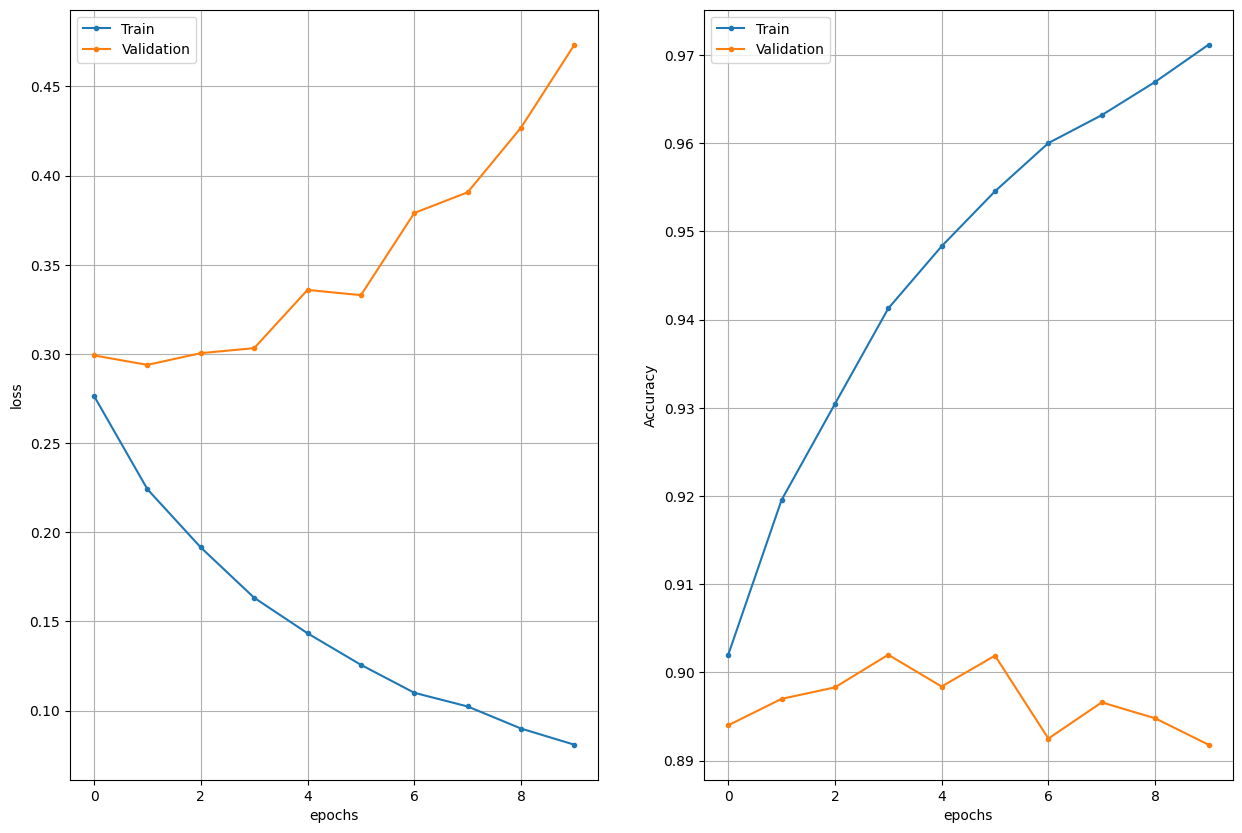

In [9]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [13]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))

net1 = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net2 = MaxPooling2D(pool_size=(2, 2))(net1)
net3 = Conv2D(32, kernel_size=(3, 3), activation="relu")(net2)
net4 = MaxPooling2D(pool_size=(2, 2))(net3)
net5 = Flatten()(net4)
outputs = Dense(num_classes, activation="softmax")(net5)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0   

In [14]:
# Train the network

epochs = 10
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 0.5994 - accuracy: 0.7855 - val_loss: 0.4450 - val_accuracy: 0.8448
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3969 - accuracy: 0.8597 - val_loss: 0.3867 - val_accuracy: 0.8606
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3544 - accuracy: 0.8732 - val_loss: 0.3690 - val_accuracy: 0.8700
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3296 - accuracy: 0.8816 - val_loss: 0.3406 - val_accuracy: 0.8814
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3124 - accuracy: 0.8883 - val_loss: 0.3469 - val_accuracy: 0.8753
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2989 - accuracy: 0.8921 - val_loss: 0.3231 - val_accuracy: 0.8851
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2865 - accuracy: 0.8965 - val_loss: 0.3261 - val_accuracy: 0.

Train Acc      0.9067333340644836
Validation Acc 0.8906000256538391


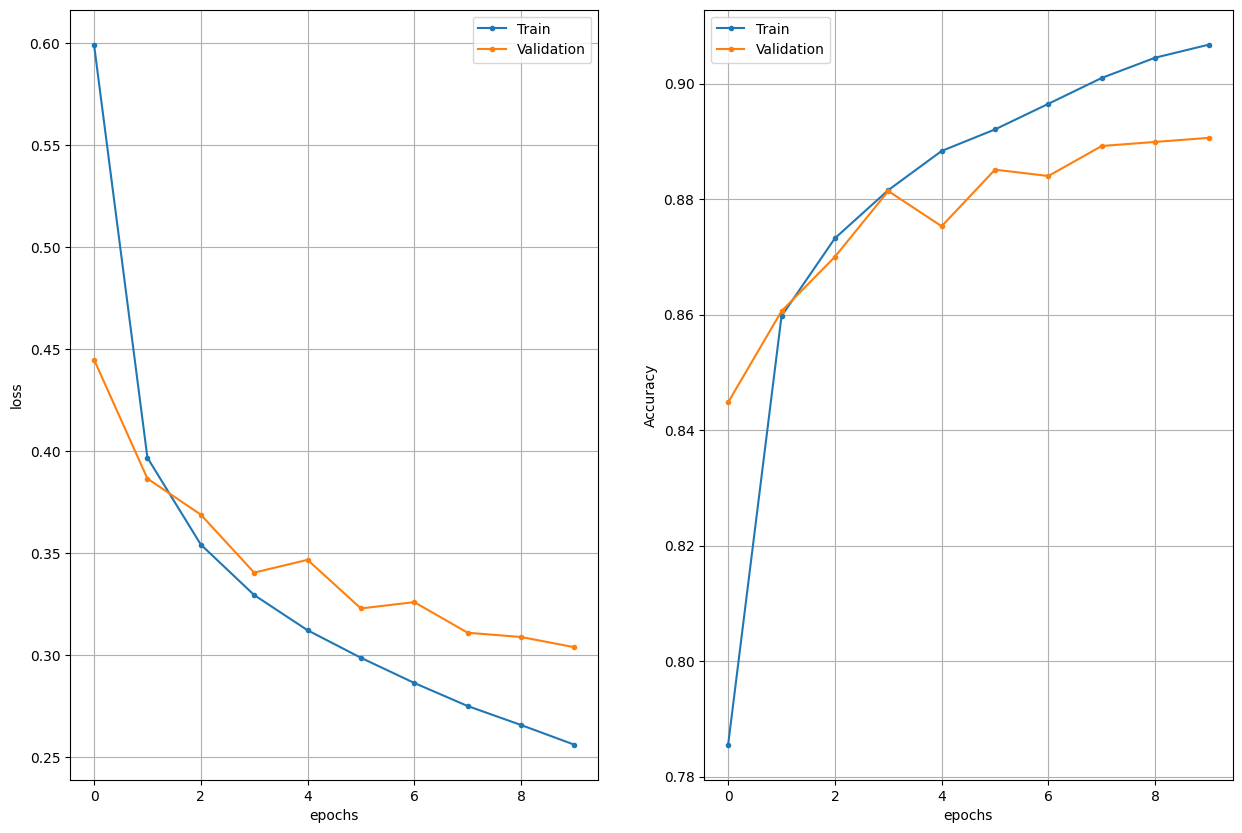

In [15]:
# Show the results

def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)


### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?